# Decision Tree Classification

Predicting Employee Attrition using Decision tree

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,roc_curve,auc
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix  # For plotting confusion matrix
from sklearn.metrics import roc_auc_score

from sklearn import tree  # For Plotting Tree


In [2]:
# import warnings
# warnings.filterwarnings("ignore")

Here Attrition is the target column

In [3]:
data = pd.read_csv('/Users/sylvia/Desktop/datasets/employees_attrition.csv')
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

**EDA**

In [5]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [6]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [7]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Imabalanced Class Problem as seen below from the value counts of the target

In [8]:
#0 : Employee does not quit
#1: Employee quits the organization
data.Attrition.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

**Feature and TArget**

In [9]:
X = data.drop(["Attrition"],axis=1)
y = data["Attrition"]

**Feature Encoding**

BusinessTravel, EducationField, Department are all categorical variables so we encode them to numbers using one-hot encoding.

In [10]:
#Encoding
X_dummies = pd.get_dummies(X)
X_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


**Train-Test Split**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X_dummies,y,
                               test_size=0.3,random_state=80, stratify=y)

# We use stratify=y since it is imbalanced class problem, ensures same proportion
# of target classes in train and test dataset.


**Modelling**

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=80)   
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=80)

Look at feature_importances_ which could be important attribute to decide which features to select to construct decision tree.

In [13]:
pd.Series(clf.feature_importances_ ,index = X_dummies.columns).sort_values(ascending=False).head(10)



OverTime_No                       0.315798
JobLevel                          0.254092
StockOptionLevel                  0.116560
YearsInCurrentRole                0.091908
JobRole_Sales Executive           0.087775
YearsWithCurrManager              0.085733
DailyRate                         0.048134
Age                               0.000000
Gender_Male                       0.000000
EducationField_Human Resources    0.000000
dtype: float64

**Prediction and Evaluation metrics**

In [14]:
y_pred = clf.predict(X_test)   #  If predicion > 0.5, u get 1 and else 0
y_pred[0:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [15]:
cm=confusion_matrix(y_test,y_pred,labels=(0,1))
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[364   6]
 [ 63   8]]


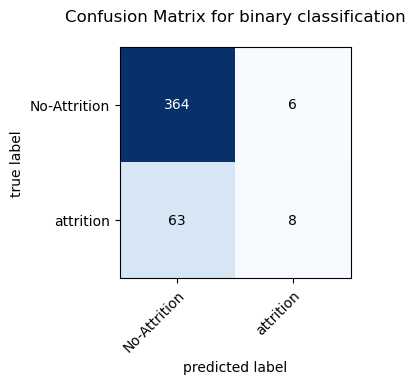

In [16]:

fig = plot_confusion_matrix(cm, class_names=['No-Attrition','attrition'],figsize=(3,3))
plt.title("Confusion Matrix for binary classification\n")
plt.show();


In [17]:
print("accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

accuracy(in %): 84.35374149659864


In [18]:
metrics.f1_score(y_test,y_pred)

0.18823529411764706

f1_score of 0.188 or 18% meaning either precision or recall or both hav v low value resulting in bad f1 score.

In [19]:
auc = roc_auc_score(y_test,y_pred) 
print ('auc_test =', auc)

auc_test = 0.548229920060906


In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.57      0.11      0.19        71

    accuracy                           0.84       441
   macro avg       0.71      0.55      0.55       441
weighted avg       0.81      0.84      0.80       441



#### Macro vs Weighted average

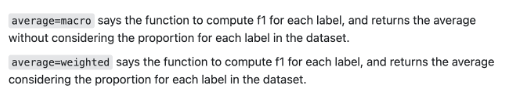

## ROC Curve

### *<font color=blue>Use roc curve to get threshold on train data & then use that threshold to classify test data for better results.* 

Graph between the True Positive Rate and False Positive Rate

### **<font color=blue>Note on predict_proba** 

Gives the class probabilities of the input samples. **The order of the
classes corresponds to that in the attribute :term:`classes_`.**

In [21]:
clf.classes_

array([0, 1])

In [22]:
# predict probabilities for the train set


y_probs = clf.predict_proba(X_train)   # Gives probability of both classes
y_probs[0:5]

array([[0.92105263, 0.07894737],
       [0.97931034, 0.02068966],
       [0.59259259, 0.40740741],
       [0.76436782, 0.23563218],
       [0.97931034, 0.02068966]])

In [23]:
# Extract all rows & 1st column i.e extract probabilities with class label=0,Negative class 

y_probs_c0 = clf.predict_proba(X_train)[:, 0]  
y_probs_c0[0:15]

array([0.92105263, 0.97931034, 0.59259259, 0.76436782, 0.97931034,
       0.91459075, 0.59259259, 0.91459075, 0.76436782, 0.92105263,
       0.76436782, 0.92105263, 0.91459075, 0.97931034, 0.92537313])

In [24]:
# Extract all rows & 2nd column i.e extract probabilities with class label=1,Positive class 

y_probs_c1 = clf.predict_proba(X_train)[:, 1]  
y_probs_c1[0:15]

array([0.07894737, 0.02068966, 0.40740741, 0.23563218, 0.02068966,
       0.08540925, 0.40740741, 0.08540925, 0.23563218, 0.07894737,
       0.23563218, 0.07894737, 0.08540925, 0.02068966, 0.07462687])

In [25]:
y_train[0:15] # actual labels

/var/folders/1j/6bqwtp0x00z_279498pht7ym0000gn/T/ipykernel_7646/4222493190.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[0:15] # actual labels


237     0
339     0
170     0
375     0
194     0
893     0
1252    0
267     0
421     1
966     1
498     0
925     0
770     0
787     0
814     0
Name: Attrition, dtype: int64

## **Note**

*<font color=blue>For ROC-AUC the input will be predicted probabilities using predict_proba rather than just predict function which gives class labels based on default threshold of 0.5*

In [26]:
# calculate the ROC curve

fpr, tpr, thresholds = roc_curve(y_train, y_probs_c1)


In [27]:
thresholds = np.round(thresholds,2)  
thresholds
# generally by default threshold is 0.50 based on which we decide a +ve or a -ve class

array([1.79, 0.79, 0.41, 0.3 , 0.24, 0.09, 0.08, 0.07, 0.02])

In [28]:
tpr

array([0.        , 0.15662651, 0.35542169, 0.47590361, 0.72289157,
       0.86746988, 0.92168675, 0.98192771, 1.        ])

In [29]:
fpr

array([0.        , 0.00811124, 0.06373117, 0.11819235, 0.27230591,
       0.57010429, 0.69177289, 0.83545771, 1.        ])

In [30]:
# calculate the AUC score
auc = roc_auc_score(y_train, y_probs_c1)
auc

0.7753493696687096

In [31]:
def plot_ROC(auc,fpr,tpr,thresholds):
    plt.title("ROC with threshold values")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    
    # annotate threshold values on roc-auc curve
    for idx in range(len(fpr)):
        plt.text(fpr[idx], tpr[idx], (thresholds[idx]), size=12) # axes.text(x, y, s) 
        #plt.plot(marker='o',mfc = 'r') 
        # x,y is position
        # s is text to be placed which is threshold value
    plt.show()

Based on below results, Ideally we want TPR near 1 and FPR near 0. 

1. If take 1.79 as threshold, we get 0 as TPR and 0 as FPR
2. If take 0.79 as threshold, we get 0.15 as TPR and 0.008 as FPR
3. If take 0.24 as threshold, we get 0.72 as TPR and 0.27 as FPR
4. If take 0.02 as threshold, we get 1 as TPR and 1 as FPR  ... etc ...

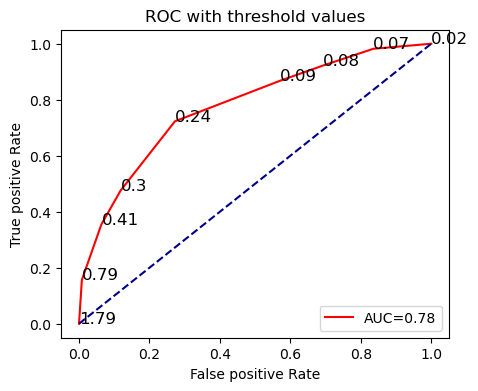

In [32]:
plt.figure(figsize=(5,4))
rzlt_fig = plot_ROC(auc,fpr,tpr,thresholds)
rzlt_fig

In summary, ROC is a graphical plot that displays the performance of a binary classifier for all possible threshold values, while AUC is a single numeric metric that summarizes the performance of the classifier.It represents the area under the ROC curve. AUC measures the ability of the classifier to distinguish between positive and negative classes. A perfect classifier will have an AUC of 1, while a random classifier will have an AUC of 0.5.





To interpret an AUC value, it's important to consider the context in which the model is being used. For example, if a high rate of false negatives is acceptable in a fraud detection system, a model with a high AUC but low recall (i.e., a high rate of false negatives) may still be suitable. Conversely, if a high rate of false negatives is not acceptable, a model with a high recall but lower AUC may be more suitable.

- Precision = TP/TP+FP,   Recall = TP/TP+FN 
- In precision for TP to be high, FP should be low (denominator, inversely propotional)
- In Recall for TP to be high, FN should be low (denominator, inversely propotional)
- We want high TP, so can choose either reducing FP or FN based on problem statement by adjusting threshold by visualizing how various thresholds affect TPR and FPR on the ROC curve, because both can't be lower at same time. This is precision-recall tradeoff.

In [33]:
#Get the best threshold 
J = tpr-fpr
ix = np.argmax(J)    # Returns the indices of the maximum values along an axis
print('Index of best threshold = ',ix)
best_thresh = thresholds[ix]
bfpr = round(fpr[ix],2)
print('Best fpr = ',bfpr)
btpr = round(tpr[ix],2)
print('Best tpr = ',btpr)

print('Best Threshold = %f'%(best_thresh))

Index of best threshold =  4
Best fpr =  0.27
Best tpr =  0.72
Best Threshold = 0.240000


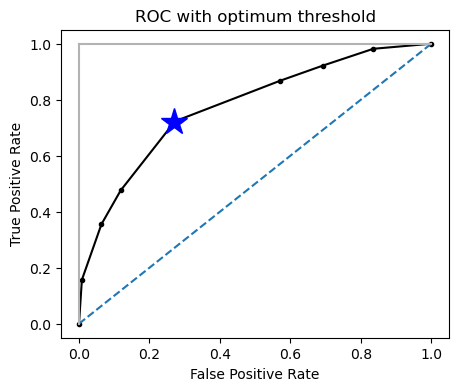

In [34]:
plt.subplots(1, figsize=(5,4))
plt.plot(fpr, tpr, marker = '.', color = 'black',label = 'Logistic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot(bfpr, btpr, marker = '*', color = 'blue', markersize=20)
plt.title('ROC with optimum threshold')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

**Based on this threshold, classify your test data**



In [35]:
y_pos_class_test = clf.predict_proba(X_test)[:,1]  
y_pos_class_test[0:5]

# Earlier auc on test with 0.5 default threshold, 0.77.

array([0.29850746, 0.07462687, 0.08540925, 0.08540925, 0.08540925])

In [36]:
y_test_pred = []
for i in y_pos_class_test:
    if i >= best_thresh:
        y_test_pred.append(1)
    # put label of +ve class (here +ve class assumed as with label 1)
    else:
        y_test_pred.append(0) 

In [37]:
# Auc on test data
# 0.54 earlier at default threshold

In [38]:
auc_test = roc_auc_score(y_test,y_test_pred) 
auc_test

0.6921393224210125

In [39]:
metrics.f1_score(y_test,y_test_pred)

# earlier F1 score 0.18

0.4857142857142857

## Plotting the Decision Tree

In [40]:
from sklearn import tree


In [41]:
cols = X_dummies.columns
cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

*Note - In clf.feature_importances_ we also saw that OverTime_No was the most important feature, here in below tree it is being used as the root node.*
At each node, entropy is being used as the criteria to split the dataset.

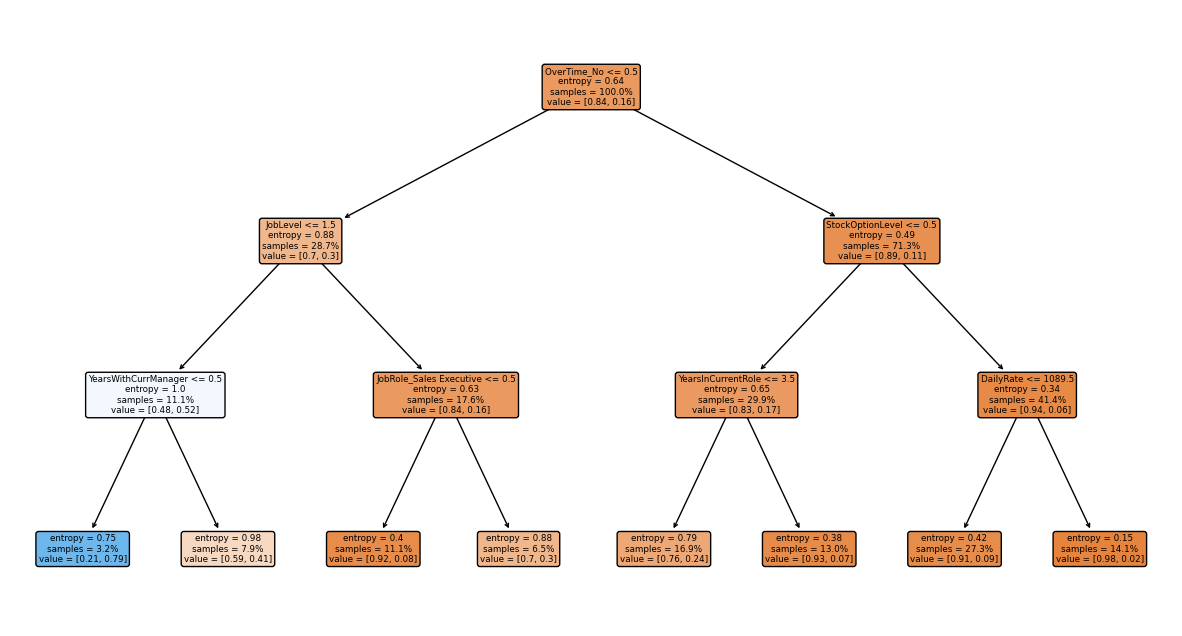

In [42]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf, feature_names=cols, filled=True,precision=2,
               proportion=True,rounded=True)
plt.show()

In [43]:
### Reference code for roc-auc, c_gpt

# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_auc_score, roc_curve
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# # generate some sample data
# X, y = make_classification(n_classes=2, random_state=42)

# # split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # train a classifier
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # predict probabilities for the test set
# y_probs = clf.predict_proba(X_test)[:, 1]

# # calculate the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# # calculate the AUC score
# auc = roc_auc_score(y_test, y_probs)

# # plot the ROC curve
# plt.plot(fpr, tpr, label="AUC: {:.3f}".format(auc))
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.legend(loc="lower right")
# plt.show()